## Animal_Computer_Vision

#### Data Prepering

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import keras



In [2]:
# Define the path to the dataset
dataset_path = r'C:\Users\eitank\personal\animal_computer_vision\Dataset'

# Use ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes = ['Buffalo','Elephant','Rhino','Zebra']
)

test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes = ['Buffalo','Elephant','Rhino','Zebra']
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


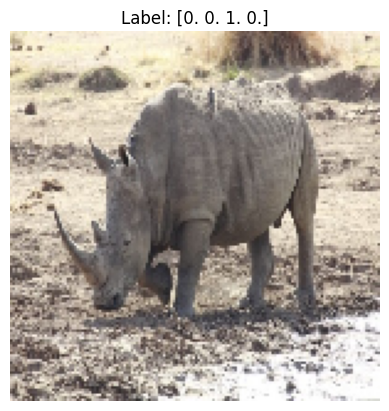

In [3]:
# Get a batch of images and labels from the validation generator
images, labels = next(test_generator)

# Display the first image in the batch
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.axis('off')  # Turn off axis
plt.show()

In [4]:
# # Define the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(4, activation='softmax')  # 4 classes for Buffalo, Elephant, Rhino, Zebra
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# my_callbacks  = [EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=5,
#                               mode='auto')]

# # Display the model summary
# model.summary()

In [5]:
# # Train the model on the training data
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     batch_size=50, epochs=10,  # You can adjust the number of epochs
#     verbose=1
# )



In [6]:
# # Plotting Accuracy, val_accuracy, loss, val_loss
# fig, ax = plt.subplots(1, 2, figsize=(10, 3))
# ax = ax.ravel()

# for i, met in enumerate(['accuracy', 'loss']):
#     ax[i].plot(history.history[met])
#     ax[i].plot(history.history['val_' + met])
#     ax[i].set_title('Model {}'.format(met))
#     ax[i].set_xlabel('epochs')
#     ax[i].set_ylabel(met)
#     ax[i].legend(['Train', 'Validation'])
# plt.show()

In [7]:
# # Predict Data Test
# pred = model.predict(validation_generator)
# pred = np.argmax(pred,axis=1)
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# pred = [labels[k] for k in pred]

# print('\033[01m              Classification_report \033[0m')

# print('\033[01m              Results \033[0m')
# # Results
# results = model.evaluate(validation_generator, verbose=0)
# print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
# print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))

In [ ]:
def func(pre, name_model):  # Define a function `func` that takes two arguments: `pre` (preprocessing function) and `name_model` (model architecture).
    print('#####~Model => {} '.format(name_model))  # Print the name of the model being used.

    # Load the pre-trained model with specified parameters.
    pre_model = name_model(input_shape=(128, 128, 3),  # Input shape is (128, 128, 3) for RGB images.
                           include_top=False,  # Exclude the fully connected layers at the top of the model.
                           weights='imagenet',  # Use weights pre-trained on the ImageNet dataset.
                           pooling='avg')  # Apply global average pooling to the output of the convolutional base.

    pre_model.trainable = False  # Freeze the pre-trained model's layers to prevent them from being updated during training.

    pre_model.summary()  # Display the model architecture.


    inputs = pre_model.input  # Get the input layer of the pre-trained model.
    x = Dense(64, activation='relu')(pre_model.output)  # Add a dense layer with 64 units and ReLU activation.
    x = Dense(64, activation='relu')(x)  # Add another dense layer with 64 units and ReLU activation.
    outputs = Dense(4, activation='softmax')(x)  # Add the output layer with 4 units (for 4 classes) and softmax activation.

    # Create a new model combining the pre-trained base and the custom layers.
    model = Model(inputs=inputs, outputs=outputs)

    model.summary()  # Display the model architecture.

    # Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy as a metric.
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    # Define early stopping to stop training if validation loss does not improve for 5 epochs.
    my_callbacks = [EarlyStopping(monitor='val_loss',
                                   min_delta=0,  # Minimum change in the monitored quantity to qualify as an improvement.
                                   patience=5,  # Number of epochs with no improvement after which training will stop.
                                   mode='auto')]  # Automatically determine whether to minimize or maximize the monitored quantity.

    # Train the model using the training and validation data.
    history = model.fit(train_generator,  # Training data generator.
                        validation_data=test_generator,  # Validation data generator.
                        epochs=50,  # Train for 50 epochs.
                        callbacks=my_callbacks,  # Use early stopping callback.
                        verbose=0)  # Suppress training output.

    # Plot training and validation accuracy and loss.
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))  # Create a figure with 2 subplots.
    ax = ax.ravel()  # Flatten the axes array for easier iteration.

    for i, met in enumerate(['accuracy', 'loss']):  # Loop through metrics: accuracy and loss.
        ax[i].plot(history.history[met])  # Plot training metric.
        ax[i].plot(history.history['val_' + met])  # Plot validation metric.
        ax[i].set_title('Model {}'.format(met))  # Set the title of the subplot.
        ax[i].set_xlabel('epochs')  # Label the x-axis as 'epochs'.
        ax[i].set_ylabel(met)  # Label the y-axis with the metric name.
        ax[i].legend(['Train', 'Validation'])  # Add a legend for training and validation.

    plt.show()  # Display the plots.

    # Predict the test data using the trained model.
    pred = model.predict(test_generator)  # Get predictions for the test data.
    pred = np.argmax(pred, axis=1)  # Convert predictions to class indices by taking the argmax.

    # Map class indices to class names.
    labels = (train_generator.class_indices)  # Get the class indices from the training generator.
    labels = dict((v, k) for k, v in labels.items())  # Reverse the dictionary to map indices to class names.
    pred = [labels[k] for k in pred]  # Convert predicted indices to class names.

    print('\033[01m              Classification_report \033[0m')  # Print a header for the classification report.

    print('\033[01m              Results \033[0m')  # Print a header for the results.

    # Evaluate the model on the test data.
    results = model.evaluate(test_generator, verbose=0)  # Get the loss and accuracy on the test data.
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))  # Print the test loss in red.
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))  # Print the test accuracy in green.

    return results  # Return the test loss and accuracy.

In [9]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
result_VGG19 = func(preprocess_input,VGG19)

#####~Model => <function VGG19 at 0x0000020284D84FE0> 


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,061,636 (76.53 MB)

 Trainable params: 37,252 (145.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

C:\Users\eitank\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 150, 150, 3)

In [ ]:
pre_model.output.shape

NameError: name 'pre_model' is not defined